<a href="https://colab.research.google.com/github/parshadk/DataMining/blob/main/dbmi_ie1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(42)
df = pd.read_csv('heart.csv')
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (920, 16)
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4          

In [ ]:
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())


Missing Values:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

Summary Statistics:
                id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  

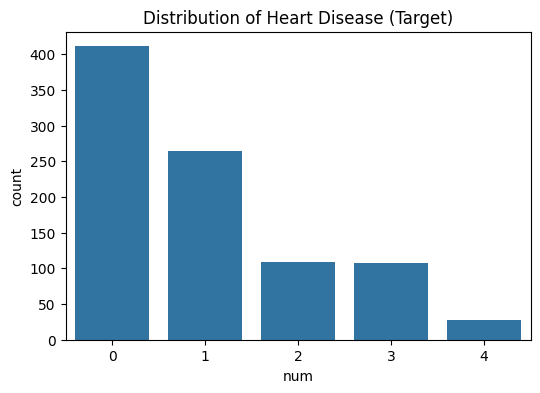

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='num', data=df)
plt.title('Distribution of Heart Disease (Target)')
plt.show()

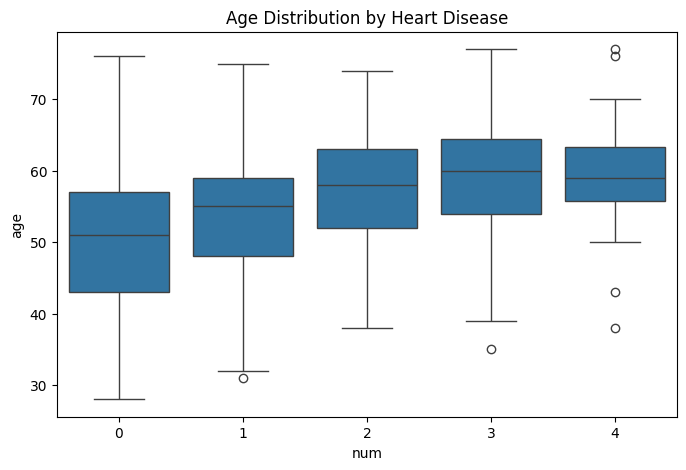

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='num', y='age', data=df)
plt.title('Age Distribution by Heart Disease')
plt.show()

In [ ]:
X = df.drop('num', axis=1)
y = df['num']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


X = df.drop('num', axis=1)
y = df['num']

categorical_cols = X.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, multi_class='ovr'),  # Explicitly multiclass
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)

    print(f"\nModel: {name}")
    print("y_test unique values:", y_test.unique())
    print("y_prob shape:", y_prob.shape)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

    results.append([name, accuracy, precision, recall, f1, auc])

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])
print("\nModel Comparison:\n", results_df)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Model: Logistic Regression
y_test unique values: [0 1 3 2 4]
y_prob shape: (184, 5)

Model: K-Nearest Neighbors
y_test unique values: [0 1 3 2 4]
y_prob shape: (184, 5)

Model: Random Forest
y_test unique values: [0 1 3 2 4]
y_prob shape: (184, 5)

Model Comparison:
                  Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.538043   0.427298  0.538043  0.470453  0.821241
1  K-Nearest Neighbors  0.532609   0.486052  0.532609  0.505321  0.701050
2        Random Forest  0.614130   0.563204  0.614130  0.577179  0.833329


In [ ]:
pip install xgboost

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply to key numeric columns
for col in ['age', 'trestbps', 'chol', 'thalch']:
    df = remove_outliers(df, col)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Define features (X) and target (y)
X = df.drop('num', axis=1)
y = df['num']

categorical_cols = X.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)


models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, multi_class='ovr'),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    'SVM': SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

    results.append([name, accuracy, precision, recall, f1, auc])
    print(f"{name} Accuracy: {accuracy:.4f}")

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])
print("\nModel Comparison:\n", results_df)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression Accuracy: 0.5984
K-Nearest Neighbors Accuracy: 0.5827


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:17:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Random Forest Accuracy: 0.6299
XGBoost Accuracy: 0.6378
SVM Accuracy: 0.6299

Model Comparison:
                  Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.598425   0.558874  0.598425  0.575813  0.806316
1  K-Nearest Neighbors  0.582677   0.593204  0.582677  0.566217  0.740972
2        Random Forest  0.629921   0.596590  0.629921  0.603586  0.835259
3              XGBoost  0.637795   0.619326  0.637795  0.623389  0.857262
4                  SVM  0.629921   0.652758  0.629921  0.637141  0.818288


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight

df = pd.read_csv('heart.csv')
print("Class Distribution (Original):\n", df['num'].value_counts(normalize=True))

df['target_binary'] = df['num'].apply(lambda x: 0 if x == 0 else 1)
print("Binary Class Distribution:\n", df['target_binary'].value_counts(normalize=True))

X = df.drop(['num', 'target_binary'], axis=1)
y = df['target_binary']

categorical_cols = X.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
df = pd.concat([X, df[['num', 'target_binary']]], axis=1)


def remove_outliers(df, column):
    if column not in df.columns:
        print(f"Column '{column}' not found in DataFrame. Skipping outlier removal for this column.")
        return df
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

numeric_cols = ['age', 'trestbps', 'chol', 'max_heart_rate']
for col in numeric_cols:
    df = remove_outliers(df, col)

# Recompute X and y after outlier removal
X = df.drop(['num', 'target_binary'], axis=1)
y = df['target_binary']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute with KNN
imputer = KNNImputer(n_neighbors=5)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Compute class weights
classes = np.unique(y_train)
weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(range(len(classes)), weights))

# Define base models for stacking
base_models = [
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=20, class_weight='balanced', random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, eval_metric='logloss')),
    ('svm', SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42))
]

# Define models (including stacking)
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, multi_class='ovr'),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=20, class_weight='balanced', random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, eval_metric='logloss'),
    'SVM': SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42),
    'Stacking': StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(max_iter=1000), cv=5)
}

results = []
for name, model in models.items():
    if name == 'XGBoost':
        model.set_params(**{'scale_pos_weight': weights.mean()})
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)  # Binary, no average needed
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob[:, 1])  # Binary ROC-AUC

    results.append([name, accuracy, precision, recall, f1, auc])
    print(f"{name} Accuracy: {accuracy:.4f}")

# Display results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])
print("\nModel Comparison:\n", results_df)

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"{name} CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Class Distribution (Original):
 num
0    0.446739
1    0.288043
2    0.118478
3    0.116304
4    0.030435
Name: proportion, dtype: float64
Binary Class Distribution:
 target_binary
1    0.553261
0    0.446739
Name: proportion, dtype: float64
Column 'max_heart_rate' not found in DataFrame. Skipping outlier removal for this column.
Logistic Regression Accuracy: 0.8217
K-Nearest Neighbors Accuracy: 0.8295


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Random Forest Accuracy: 0.8682
XGBoost Accuracy: 0.8605
SVM Accuracy: 0.8217
Stacking Accuracy: 0.8760

Model Comparison:
                  Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.821705   0.786885  0.827586  0.806723  0.889267
1  K-Nearest Neighbors  0.829457   0.781250  0.862069  0.819672  0.886231
2        Random Forest  0.868217   0.825397  0.896552  0.859504  0.938927
3              XGBoost  0.860465   0.812500  0.896552  0.852459  0.935891
4                  SVM  0.821705   0.761194  0.879310  0.816000  0.909665
5             Stacking  0.875969   0.828125  0.913793  0.868852  0.940748
Logistic Regression CV Accuracy: 0.8560 ± 0.0240
K-Nearest Neighbors CV Accuracy: 0.8152 ± 0.0100


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

Random Forest CV Accuracy: 0.8697 ± 0.0177
XGBoost CV Accuracy: 0.8697 ± 0.0112
SVM CV Accuracy: 0.8346 ± 0.0193
Stacking CV Accuracy: 0.8717 ± 0.0185


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight
import pickle

# Load dataset
df = pd.read_csv('heart.csv')

# Convert to binary classification
df['target_binary'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

# Define X and y
X = df.drop(['num', 'target_binary'], axis=1)
y = df['target_binary']

# Handle categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Update df with encoded columns
df = pd.concat([X, df[['num', 'target_binary']]], axis=1)

# Outlier removal function
def remove_outliers(df, column):
    if column not in df.columns:
        print(f"Column '{column}' not found in DataFrame. Skipping outlier removal for this column.")
        return df
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply outlier removal
numeric_cols = ['age', 'trestbps', 'chol', 'max_heart_rate']
for col in numeric_cols:
    df = remove_outliers(df, col)

# Recompute X and y
X = df.drop(['num', 'target_binary'], axis=1)
y = df['target_binary']


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute with KNN
imputer = KNNImputer(n_neighbors=5)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Compute class weights
classes = np.unique(y_train)
weights = compute_class_weight('balanced', classes=classes, y=y_train)

# Define base models for stacking
base_models = [
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=20, class_weight='balanced', random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, eval_metric='logloss')),
    ('svm', SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42))
]

# Define stacking model
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(max_iter=1000), cv=5)

# Train the model
stacking_model.fit(X_train_scaled, y_train)

# Save the model, imputer, and scaler using pickle
with open('stacking_model.pkl', 'wb') as f:
    pickle.dump(stacking_model, f)
with open('imputer.pkl', 'wb') as f:
    pickle.dump(imputer, f)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Model, imputer, and scaler saved successfully!")

Column 'max_heart_rate' not found in DataFrame. Skipping outlier removal for this column.
Model, imputer, and scaler saved successfully!


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('heart.csv')

# Convert to binary classification
df['target_binary'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

# Define X and y
X = df.drop(['num', 'target_binary'], axis=1)
y = df['target_binary']

# Handle categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Update df with encoded columns
df = pd.concat([X, df[['num', 'target_binary']]], axis=1)

# Outlier removal function
def remove_outliers(df, column):
    if column not in df.columns:
        print(f"Column '{column}' not found in DataFrame. Skipping outlier removal for this column.")
        return df
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply outlier removal
numeric_cols = ['age', 'trestbps', 'chol', 'max_heart_rate']
for col in numeric_cols:
    df = remove_outliers(df, col)

# Recompute X and y
X = df.drop(['num', 'target_binary'], axis=1)
y = df['target_binary']



# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute with KNN
imputer = KNNImputer(n_neighbors=5)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Compute class weights
classes = np.unique(y_train)
weights = compute_class_weight('balanced', classes=classes, y=y_train)

# Define models
rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, class_weight='balanced', random_state=42)
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, eval_metric='logloss')
svm_model = SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42)

# Define base models for stacking
base_models = [
    ('rf', rf_model),
    ('xgb', xgb_model),
    ('svm', svm_model)
]

# Define stacking model
stacking_model = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression(max_iter=1000), cv=5)

# Train models
rf_model.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)
stacking_model.fit(X_train_scaled, y_train)

# Figure 1: ROC Curves for Top-Performing Models
plt.figure(figsize=(8, 6))
models = {'Random Forest': rf_model, 'XGBoost': xgb_model, 'Stacking Classifier': stacking_model}
colors = ['blue', 'green', 'red']

for (name, model), color in zip(models.items(), colors):
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{name} (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Figure 1: ROC Curves for Top-Performing Models')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('roc_curves.png', dpi=300, bbox_inches='tight')
plt.close()

# Figure 2: Confusion Matrix for Stacking Classifier
y_pred = stacking_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Disease', 'Disease'])

plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Figure 2: Confusion Matrix for Stacking Classifier')
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.close()

# Figure 3: Feature Importance from Random Forest
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Figure 3: Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.close()

print("Figures saved as 'roc_curves.png', 'confusion_matrix.png', and 'feature_importance.png'")

Column 'max_heart_rate' not found in DataFrame. Skipping outlier removal for this column.
Figures saved as 'roc_curves.png', 'confusion_matrix.png', and 'feature_importance.png'


<Figure size 800x600 with 0 Axes>